## 라이브러리 로드

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
# !pip install koreanize-matplotlib
import koreanize_matplotlib

%config InlineBackend.figure_format = 'retina'

## 데이터 로드

In [46]:
df = pd.read_parquet("https://github.com/corazzon/KaggleStruggle/raw/master/online-retail/data/online_retail.gzip")
df.shape

(541909, 8)

In [47]:
# 주문 날짜 데이터 전처리
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"].astype(str))
df["InvoiceMonth"] = df["InvoiceDate"].dt.month

In [48]:
# 주문 취소 건 제외
df = df[df["UnitPrice"] > 0].copy()
df = df[df["Quantity"] > 0].copy()

In [49]:
# 주문 가격
df["TotalPrice"] = df["Quantity"] * df["UnitPrice"]
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20.34


In [50]:
# 데이터 타입 변경

df["Country"] = df["Country"].astype(str)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 530104 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   InvoiceNo     530104 non-null  category      
 1   StockCode     530104 non-null  category      
 2   Description   530104 non-null  category      
 3   Quantity      530104 non-null  int32         
 4   InvoiceDate   530104 non-null  datetime64[ns]
 5   UnitPrice     530104 non-null  float64       
 6   CustomerID    397884 non-null  float32       
 7   Country       530104 non-null  object        
 8   InvoiceMonth  530104 non-null  int64         
 9   TotalPrice    530104 non-null  float64       
dtypes: category(3), datetime64[ns](1), float32(1), float64(2), int32(1), int64(1), object(1)
memory usage: 32.9+ MB



## 미션1) 심슨의 역설을 설명하기 위한 구체적인 분석을 다음의 순서로 진행해 주세요.

심슨의 역설(Simpson's Paradox)은 통계 데이터를 해석할 때 발생할 수 있는 현상으로, 일부 하위 그룹에서 관찰된 추세가 전체 데이터를 합쳤을 때 반전될 수 있음을 나타냅니다. 이 현상은 복잡한 데이터에서 하위 그룹 간에 상이한 분포나 크기 때문에 발생할 수 있습니다.

심슨의 역설을 설명하기 위해서는, 데이터 내에서 서로 상반된 추세를 보이는 하위 그룹을 찾거나 생성해야 합니다. 예를 들어, 특정 상품의 판매량이나 단가가 국가별로 다른 추세를 보이는지, 혹은 특정 기간 동안의 판매 추세가 전체 기간 동안의 추세와 다른지 등을 분석할 수 있습니다.

데이터를 제시한 특정 국가로 하위 그룹으로 나눕니다.
각 하위 그룹에서 총 판매금액의 추세를 분석합니다.
전체 데이터셋에 대해 동일한 지표를 분석합니다.
하위 그룹의 추세와 전체 데이터의 추세가 서로 다른 방향성을 보일 경우, 이를 통해 심슨의 역설을 설명합니다.
이러한 분석을 위해, 데이터 내에서 적절한 변수와 하위 그룹을 선정하는 것이 중요합니다. 현재 제공된 데이터만으로는 심슨의 역설을 바로 설명할 수 있는 명확한 예시를 찾기 어려울 수 있지만, 데이터를 깊이 분석하면 관련 현상을 발견할 수도 있습니다.
다음 국가에 대해 상관계수를 구하고 seaborn 의 lmplot을 사용하여 시각화 하고 심슨의 역설을 설명할 수 있는지 분석해 주세요.
또, 이를 비즈니스에 어떻게 활용할 수 있을지도 설명해 주세요.

```python
country_group = ["Japan", "Hong Kong", "Singapore", "Lebanon", "Canada", "USA"]
```


* 슬라이드 자료에서 "심슨의 역설"을 찾아주세요.

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 530104 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   InvoiceNo     530104 non-null  category      
 1   StockCode     530104 non-null  category      
 2   Description   530104 non-null  category      
 3   Quantity      530104 non-null  int32         
 4   InvoiceDate   530104 non-null  datetime64[ns]
 5   UnitPrice     530104 non-null  float64       
 6   CustomerID    397884 non-null  float32       
 7   Country       530104 non-null  object        
 8   InvoiceMonth  530104 non-null  int64         
 9   TotalPrice    530104 non-null  float64       
dtypes: category(3), datetime64[ns](1), float32(1), float64(2), int32(1), int64(1), object(1)
memory usage: 32.9+ MB


In [53]:
df.describe()

,Quantity,UnitPrice,CustomerID,InvoiceMonth,TotalPrice
count,530104.000000,530104.000000,397884.000000,530104.000000,530104.000000
mean,10.542037,3.907625,15294.422852,7.560611,20.121871
std,155.524124,35.915681,1713.141602,3.508496,270.356743
min,1.000000,0.001000,12346.000000,1.000000,0.001000
25%,1.000000,1.250000,13969.000000,5.000000,3.750000
50%,3.000000,2.080000,15159.000000,8.000000,9.900000
75%,10.000000,4.130000,16795.000000,11.000000,17.700000
max,80995.000000,13541.330000,18287.000000,12.000000,168469.600000


In [54]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20.34
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,12,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,12,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,12,16.60


In [55]:
df.groupby('Country').agg({'TotalPrice': ['mean', 'count']})

TotalPrice        
                            mean   count
Country                                 
Australia             117.192310    1182
Austria                25.624824     398
Bahrain                41.896667      18
Belgium                20.283772    2031
Brazil                 35.737500      32
Canada                 24.280662     151
Channel Islands        27.340160     748
Cyprus                 22.134169     614
Czech Republic         33.069600      25
Denmark                49.882474     380
EIRE                   35.925724    7890
European Community     21.670833      60
Finland                32.913985     685
France                 24.945297    8407
Germany                25.317162    9040
Greece                 32.831172     145
Hong Kong              55.252817     284
Iceland                23.681319     182
Israel                 27.577153     295
Italy                  23.064960     758
Japan                 116.561900     321
Lebanon                37.641778      45
Lithuania              47.458857      35
Malta                  24.335625     112
Netherlands           121.003111    2359
Norway                 33.767918    1071
Poland                 22.226212     330
Portugal               22.483078    1501
RSA                    17.584386      57
Saudi Arabia           16.213333       9
Singapore              95.852658     222
Spain                  24.789497    2484
Sweden                 85.096075     451
Switzerland            29.038606    1966
USA                    20.002179     179
United Arab Emirates   27.974706      68
United Kingdom         18.603987  485123
Unspecified            10.649753     446

In [56]:
country_group = ["Japan", "Hong Kong", "Singapore", "Lebanon", "Canada", "USA"]

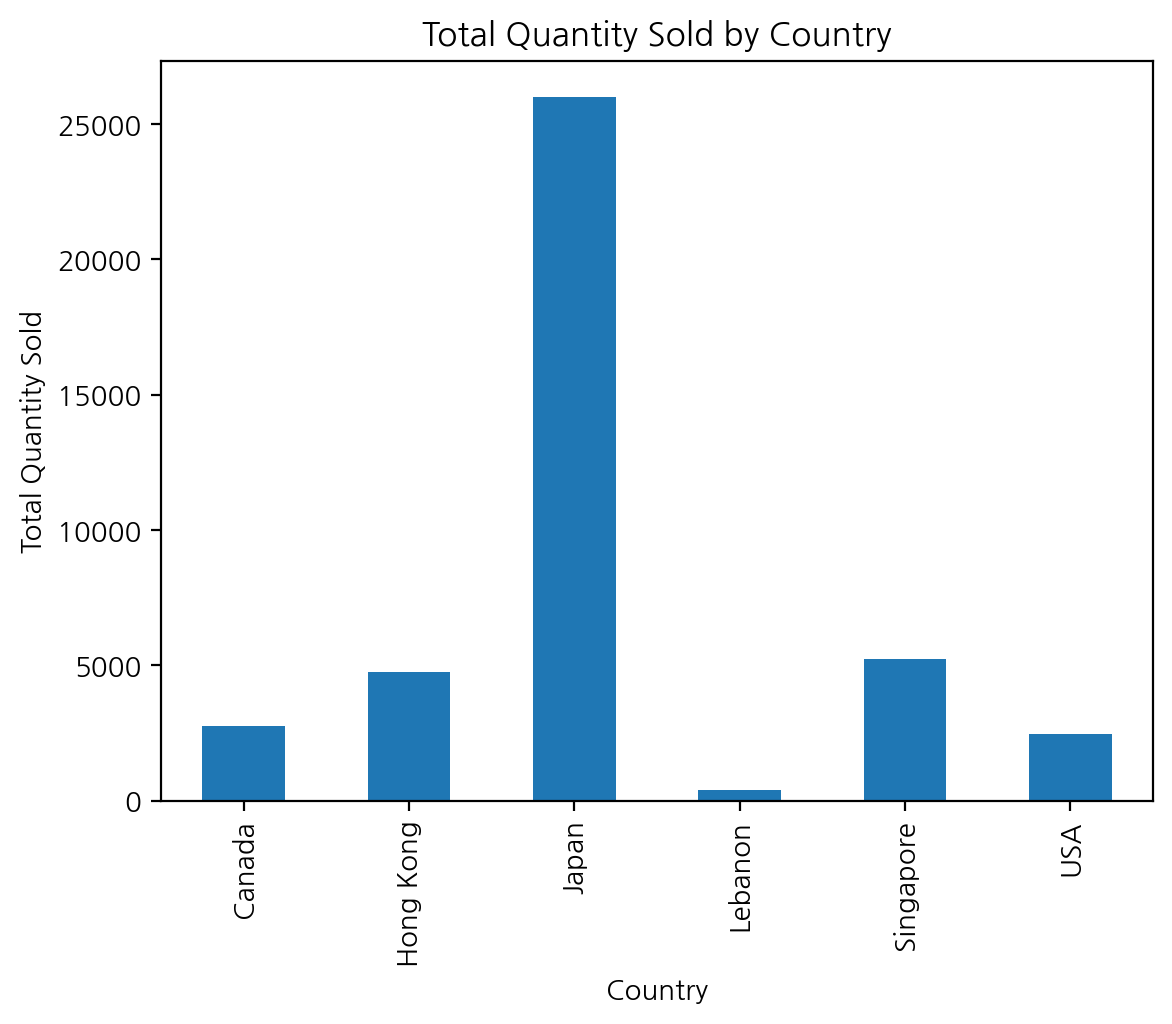

In [57]:
country_sales = df[df['Country'].isin(country_group)].groupby('Country')['Quantity'].sum()
country_sales.plot(kind='bar')
plt.ylabel('Total Quantity Sold')
plt.title('Total Quantity Sold by Country')
plt.show()

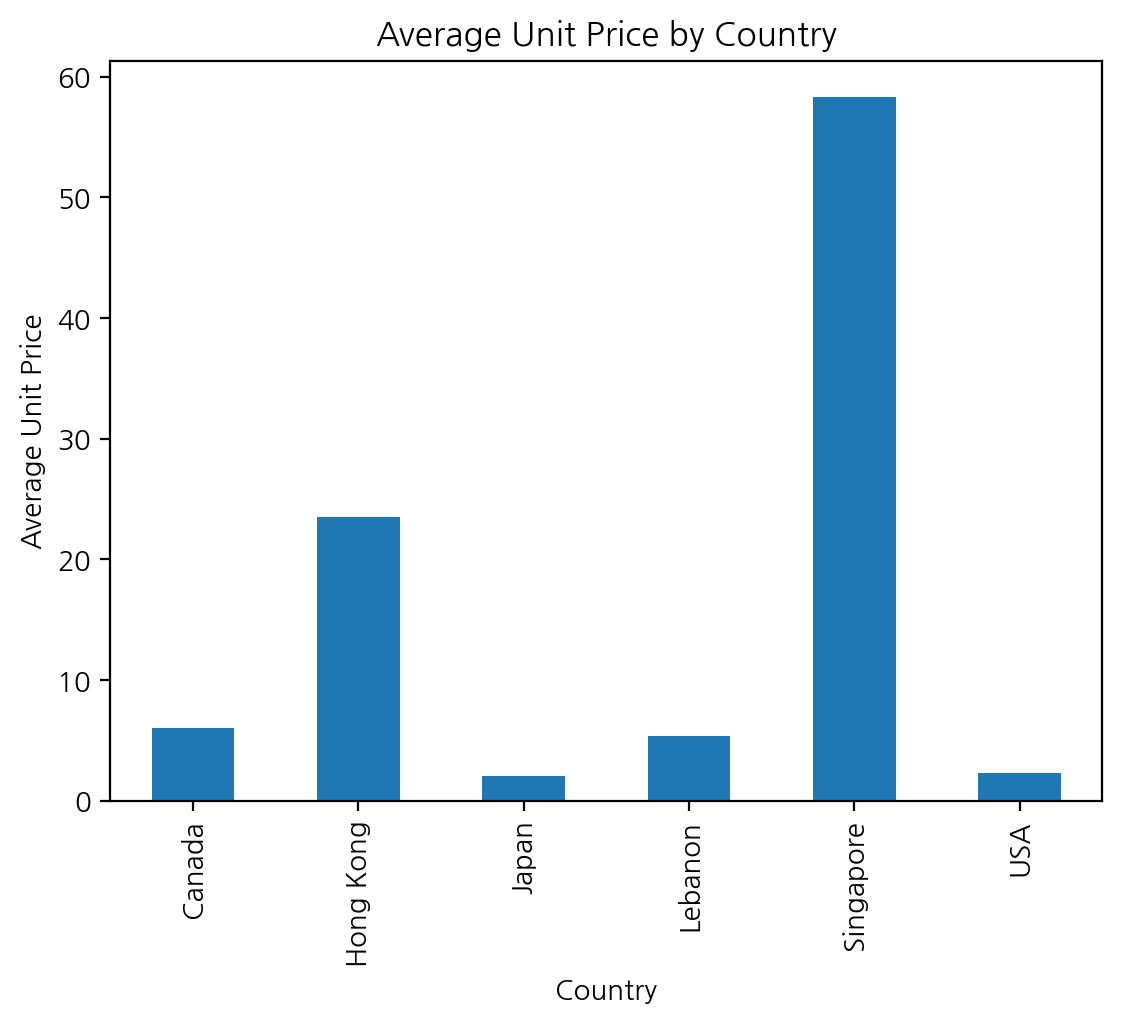

In [58]:
country_prices = df[df['Country'].isin(country_group)].groupby('Country')['UnitPrice'].mean()
country_prices.plot(kind='bar')
plt.ylabel('Average Unit Price')
plt.title('Average Unit Price by Country')
plt.show()

In [59]:
df[df['Country'].isin(country_group)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,TotalPrice
9783,537218,85016,SET OF 6 VINTAGE NOTELETS KIT,6,2010-12-05 15:46:00,2.55,12763.0,Japan,12,15.30
9784,537218,21506,"FANCY FONT BIRTHDAY CARD,",12,2010-12-05 15:46:00,0.42,12763.0,Japan,12,5.04
9785,537218,22716,CARD CIRCUS PARADE,12,2010-12-05 15:46:00,0.42,12763.0,Japan,12,5.04
9786,537218,22983,CARD BILLBOARD FONT,12,2010-12-05 15:46:00,0.42,12763.0,Japan,12,5.04
9787,537218,22030,SWALLOWS GREETING CARD,12,2010-12-05 15:46:00,0.42,12763.0,Japan,12,5.04
...,...,...,...,...,...,...,...,...,...,...
524432,580553,20675,BLUE POLKADOT BOWL,16,2011-12-05 10:14:00,1.25,12646.0,USA,12,20.00
524433,580553,20676,RED RETROSPOT BOWL,16,2011-12-05 10:14:00,1.25,12646.0,USA,12,20.00
524434,580553,20975,12 PENCILS SMALL TUBE RED RETROSPOT,72,2011-12-05 10:14:00,0.65,12646.0,USA,12,46.80
524435,580553,22083,PAPER CHAIN KIT RETROSPOT,12,2011-12-05 10:14:00,2.95,12646.0,USA,12,35.40


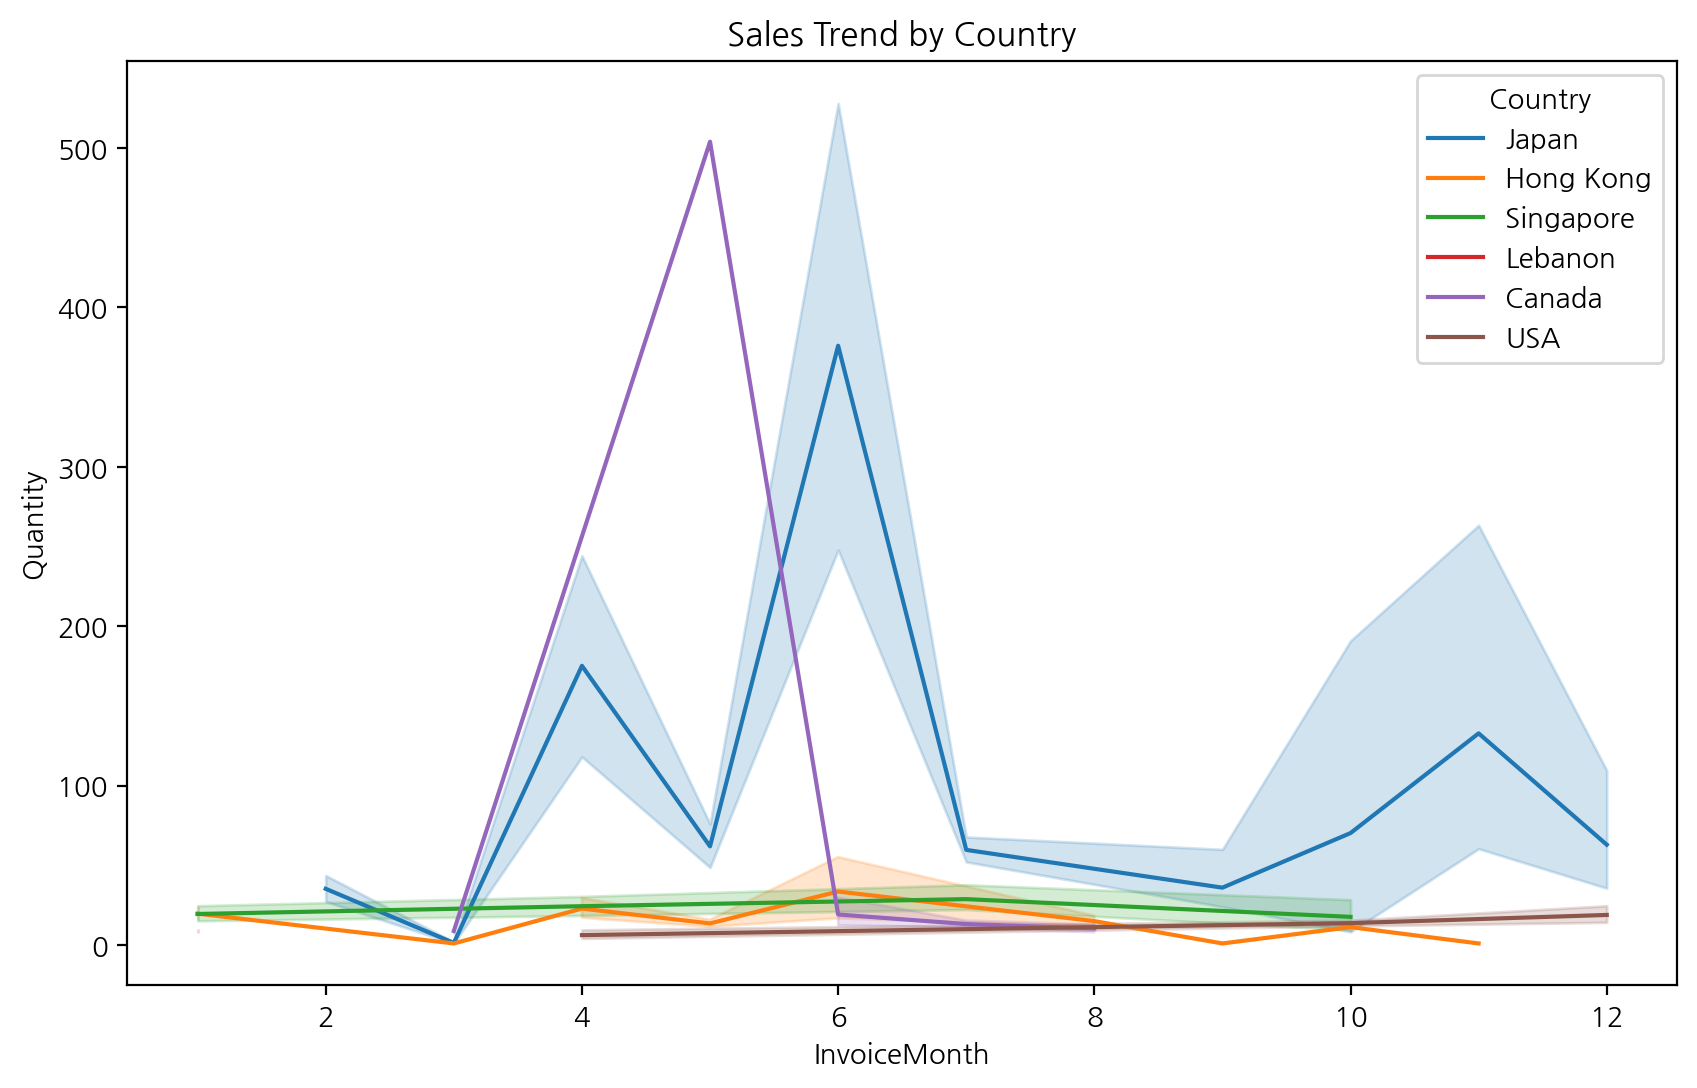

In [60]:
# 국가별 판매 추세
plt.figure(figsize=(10, 6))
sns.lineplot(x='InvoiceMonth', y='Quantity', hue='Country', data=df[df['Country'].isin(country_group)])
plt.title('Sales Trend by Country')
plt.show()

In [61]:
df[(df['Country'] == 'Singapore') & df['Country'].isin(country_group)]


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,TotalPrice
70758,542102,21519,GIN & TONIC DIET GREETING CARD,72,2011-01-25 13:26:00,0.36,12744.0,Singapore,1,25.92
70759,542102,22697,GREEN REGENCY TEACUP AND SAUCER,6,2011-01-25 13:26:00,2.95,12744.0,Singapore,1,17.70
70760,542102,22699,ROSES REGENCY TEACUP AND SAUCER,6,2011-01-25 13:26:00,2.95,12744.0,Singapore,1,17.70
70761,542102,22343,PARTY PIZZA DISH RED RETROSPOT,24,2011-01-25 13:26:00,0.21,12744.0,Singapore,1,5.04
70762,542102,22344,PARTY PIZZA DISH PINK POLKADOT,24,2011-01-25 13:26:00,0.21,12744.0,Singapore,1,5.04
...,...,...,...,...,...,...,...,...,...,...
398368,571239,21949,SET OF 6 STRAWBERRY CHOPSTICKS,12,2011-10-14 14:54:00,1.25,12744.0,Singapore,10,15.00
398369,571239,23229,VINTAGE DONKEY TAIL GAME,6,2011-10-14 14:54:00,3.75,12744.0,Singapore,10,22.50
398370,571239,21888,BINGO SET,12,2011-10-14 14:54:00,3.75,12744.0,Singapore,10,45.00
406406,571751,M,Manual,1,2011-10-19 11:18:00,3949.32,12744.0,Singapore,10,3949.32


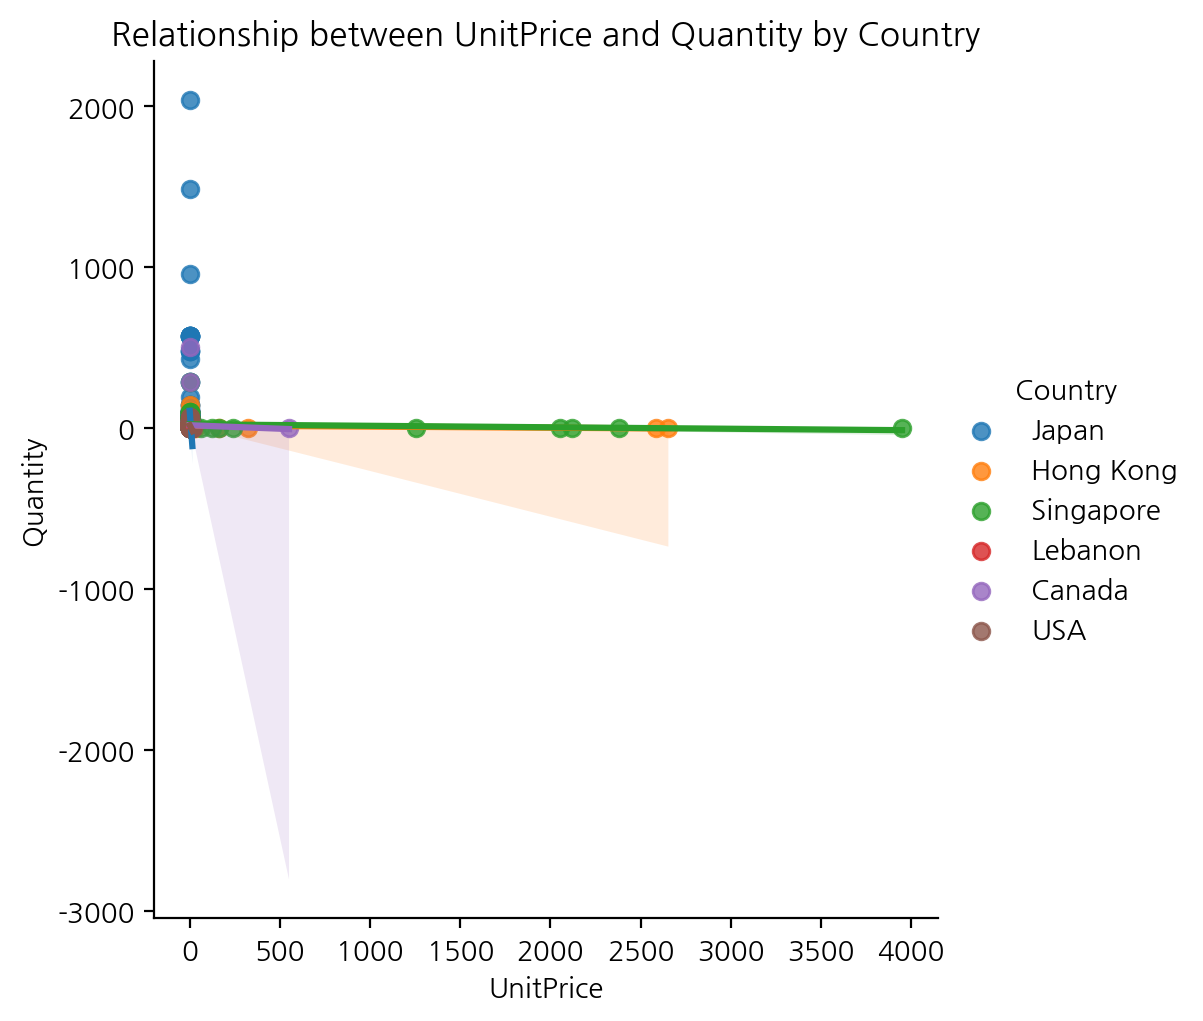

In [62]:
# lmplot을 사용하여 'UnitPrice'와 'Quantity' 사이의 관계를 시각화합니다.
sns.lmplot(x='UnitPrice', y='Quantity', hue='Country', data=df[df['Country'].isin(country_group)])
plt.title('Relationship between UnitPrice and Quantity by Country')
plt.show()

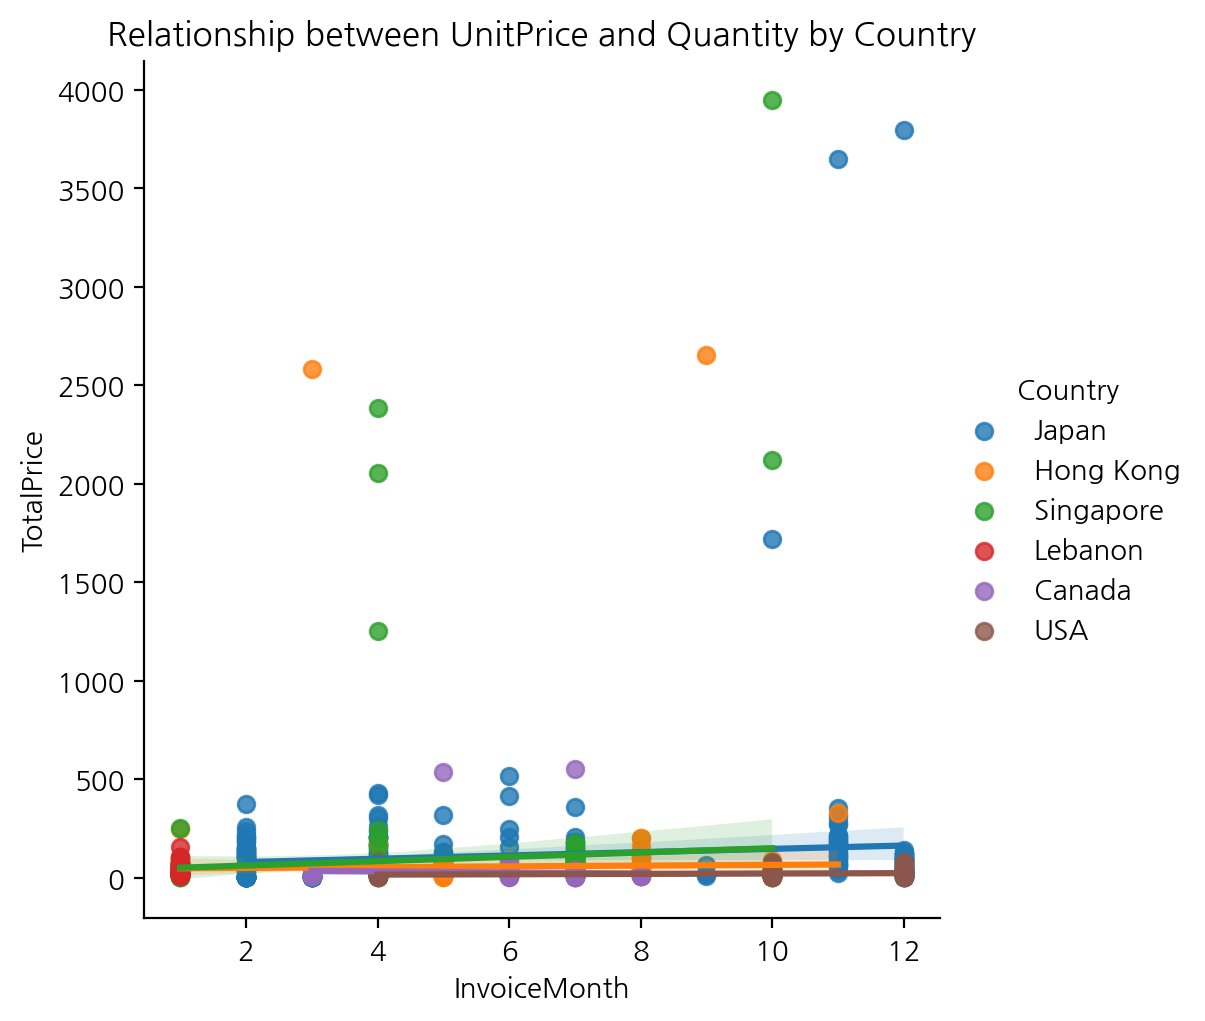

In [63]:
sns.lmplot(x='InvoiceMonth', y='TotalPrice', hue='Country', data=df[df['Country'].isin(country_group)])
plt.title('Relationship between UnitPrice and Quantity by Country')
plt.show()

일본: 일본은 가격과 판매량에 대한 뚜렷한 경향성을 보입니다. 청구 월이 증가함에 따라 총 가격이 증가하며, 단위 가격이 증가할수록 판매 수량이 감소하는 경향이 있습니다. 또한, 6월경에 판매량이 크게 증가하는 시즌성을 보임

미국: 미국은 일본만큼의 가격과 판매량에 대한 경향성을 보이지 않지만, 6월경에 판매량이 약간 증가하는 경향이 있습니다.

홍콩, 싱가포르, 레바논, 캐나다: 이들 국가들은 가격과 판매량에 대한 명확한 경향성을 보이지 않습니다. 대부분의 품목이 낮은 가격 범위에서 판매되며, 판매량은 안정적입니다.



## 미션2) 상품의 단가와 총 판매액의 관계를 분석해 주세요.

상품의 단가가 총 판매액에 미치는 영향을 이해하고 예측하는 것입니다. 이 분석은 가격 결정 전략을 개선하고, 수익성을 최대화하기 위해 사용될 수 있습니다.
높은 단가의 상품이 더 많은 총 판매액을 생성할 것이라는 가설을 설정합니다.

1) 데이터 전처리: 필요한 데이터를 정리하고, 결측치를 제거합니다.\
2) 단순 회귀분석: 단가(UnitPrice)를 독립변수로, 총 판매액(TotalSales)을 종속변수로 설정하여 회귀분석을 수행합니다.\
3) 결과 해석: 회귀계수와 결정계수를 분석하여 상품 가격과 총 판매액 사이의 관계를 해석합니다.

In [64]:
import statsmodels.api as sm
# 데이터 전처리
# 결측치 제거 또는 대체
df = df.dropna(subset=['UnitPrice', 'TotalPrice'])

# 단순 회귀분석
# 독립변수: UnitPrice, 종속변수: TotalPrice
X = df['UnitPrice']
y = df['TotalPrice']
X = sm.add_constant(X) # 상수항 추가

<ipython-input-65-8c6bb5cdcc4d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


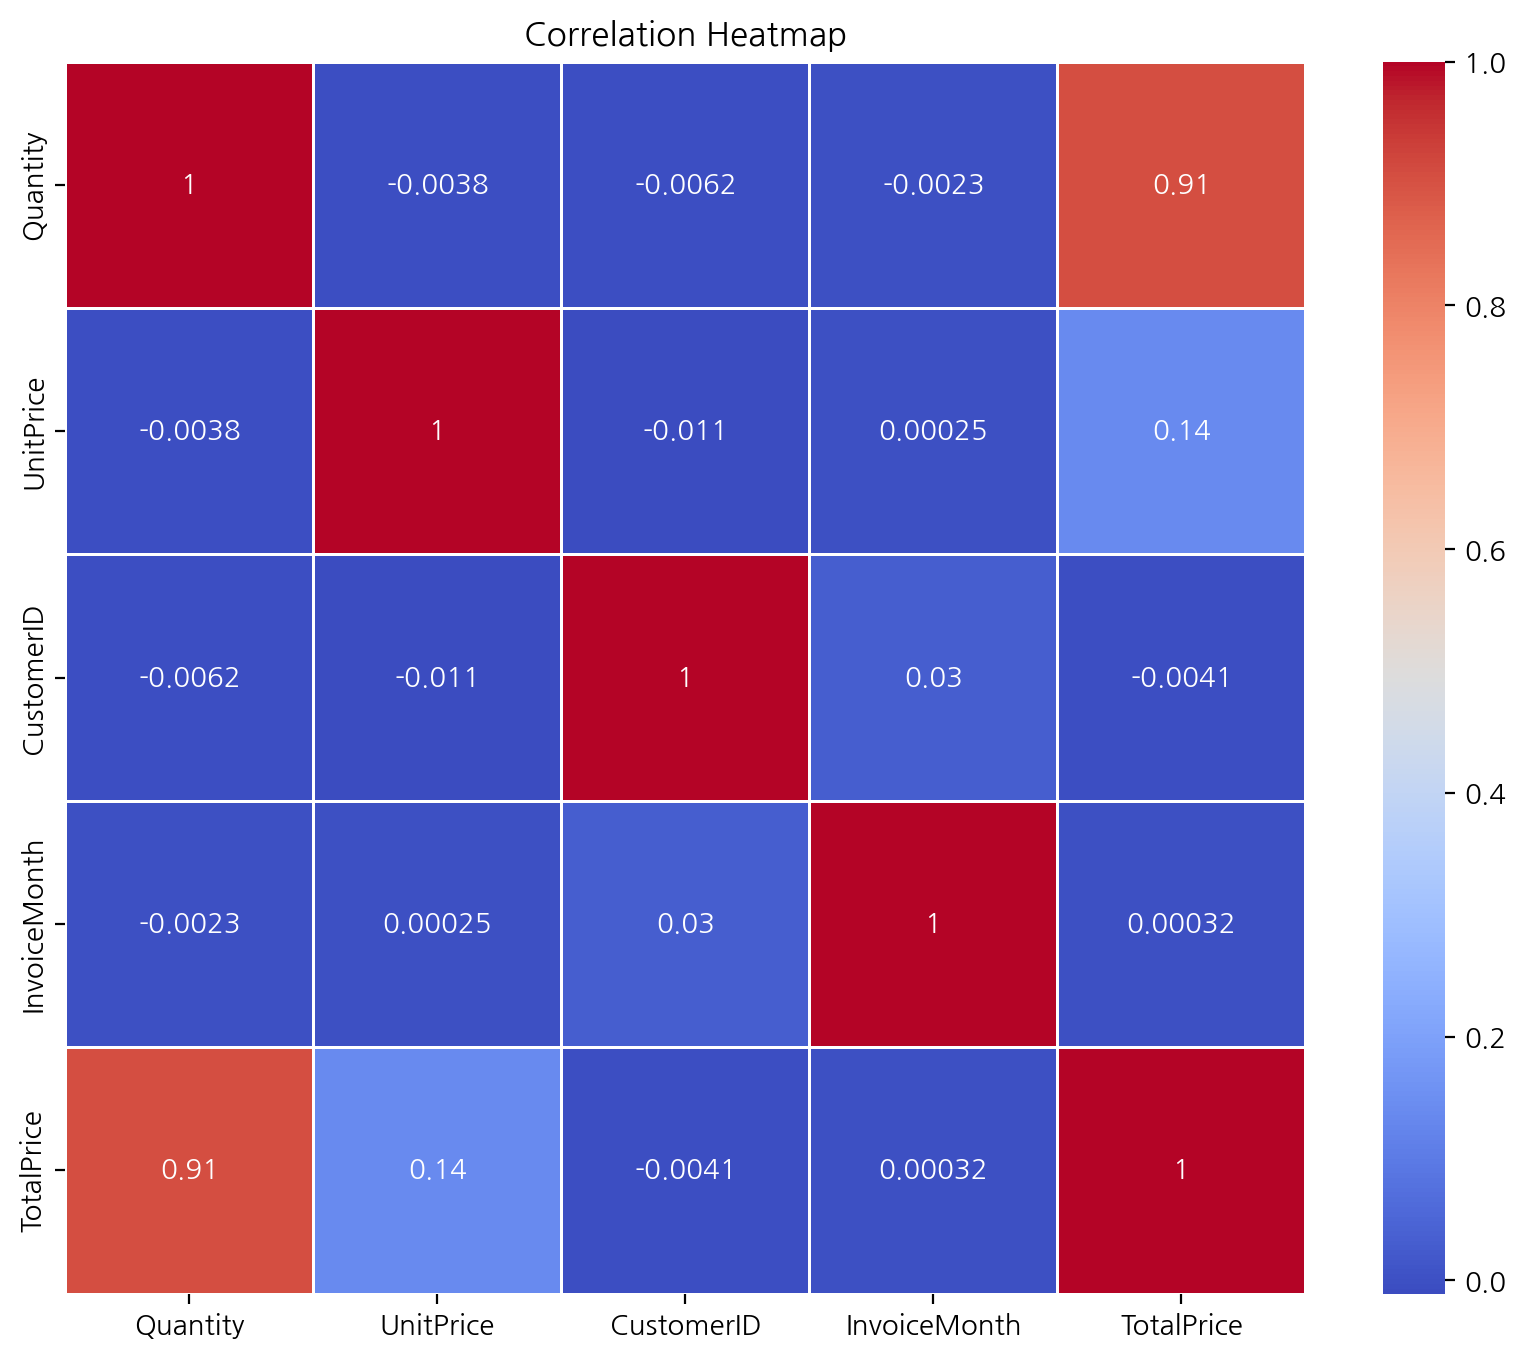

In [65]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

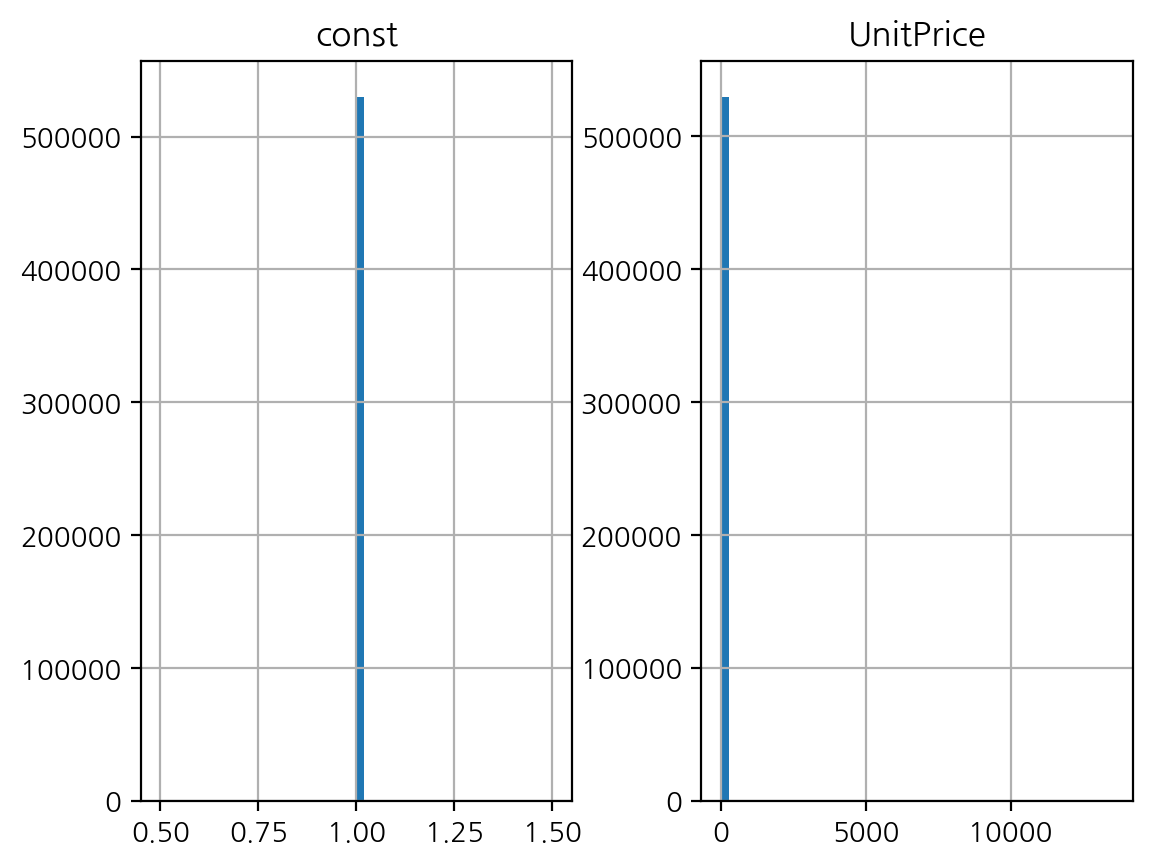

In [66]:
X.hist(bins=50);

In [67]:
X.columns


Index(['const', 'UnitPrice'], dtype='object')

In [68]:
X["const"] = np.log1p(X["const"])
X["UnitPrice"] = np.log1p(X["UnitPrice"])

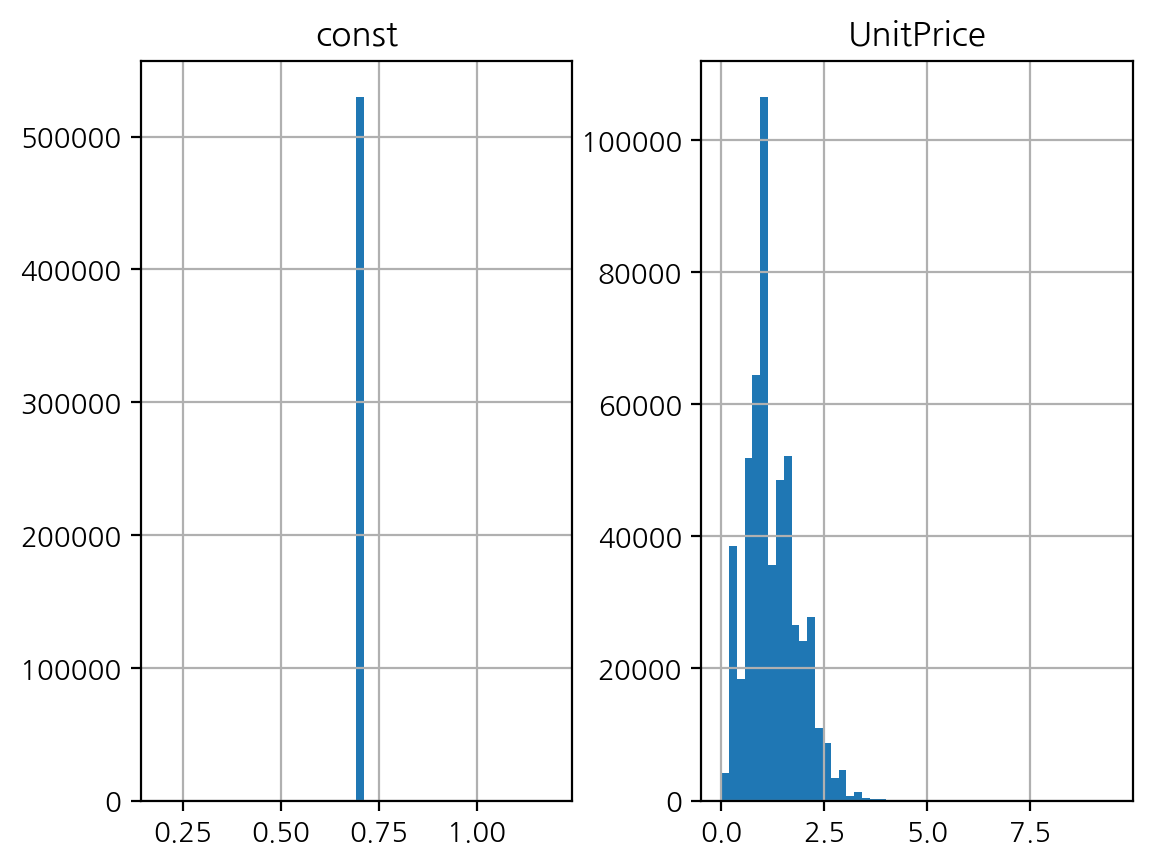

In [69]:
X.hist(bins=50);

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X_trasform = X
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_trasform)
pd.DataFrame(X_scaled, columns=X_trasform.columns).describe().round(4)

,const,UnitPrice
count,530104.0,530104.0000
mean,0.0,-0.0000
std,0.0,1.0000
min,0.0,-1.9244
25%,0.0,-0.6666
50%,0.0,-0.1789
75%,0.0,0.6134
max,0.0,12.8487


In [71]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [72]:
# 상수항 추가
X_train_ols = sm.add_constant(X_train)

# OLS 모델 피팅
model_ols = sm.OLS(y_train, X_train).fit()

In [73]:
# 모델 요약 정보 출력
print(model_ols.summary())

                            OLS Regression Results                            
Dep. Variable:             TotalPrice   R-squared:                      -0.003
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                       nan
Date:                Fri, 02 Feb 2024   Prob (F-statistic):                nan
Time:                        03:42:58   Log-Likelihood:            -3.0130e+06
No. Observations:              424083   AIC:                         6.026e+06
Df Residuals:                  424082   BIC:                         6.026e+06
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.001e-19   1.66e-20    -24.053      0.0

In [74]:
# 선형 회귀 모델 초기화 및 피팅
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [75]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 19246.119443701133
R-squared: 0.007386750843011436


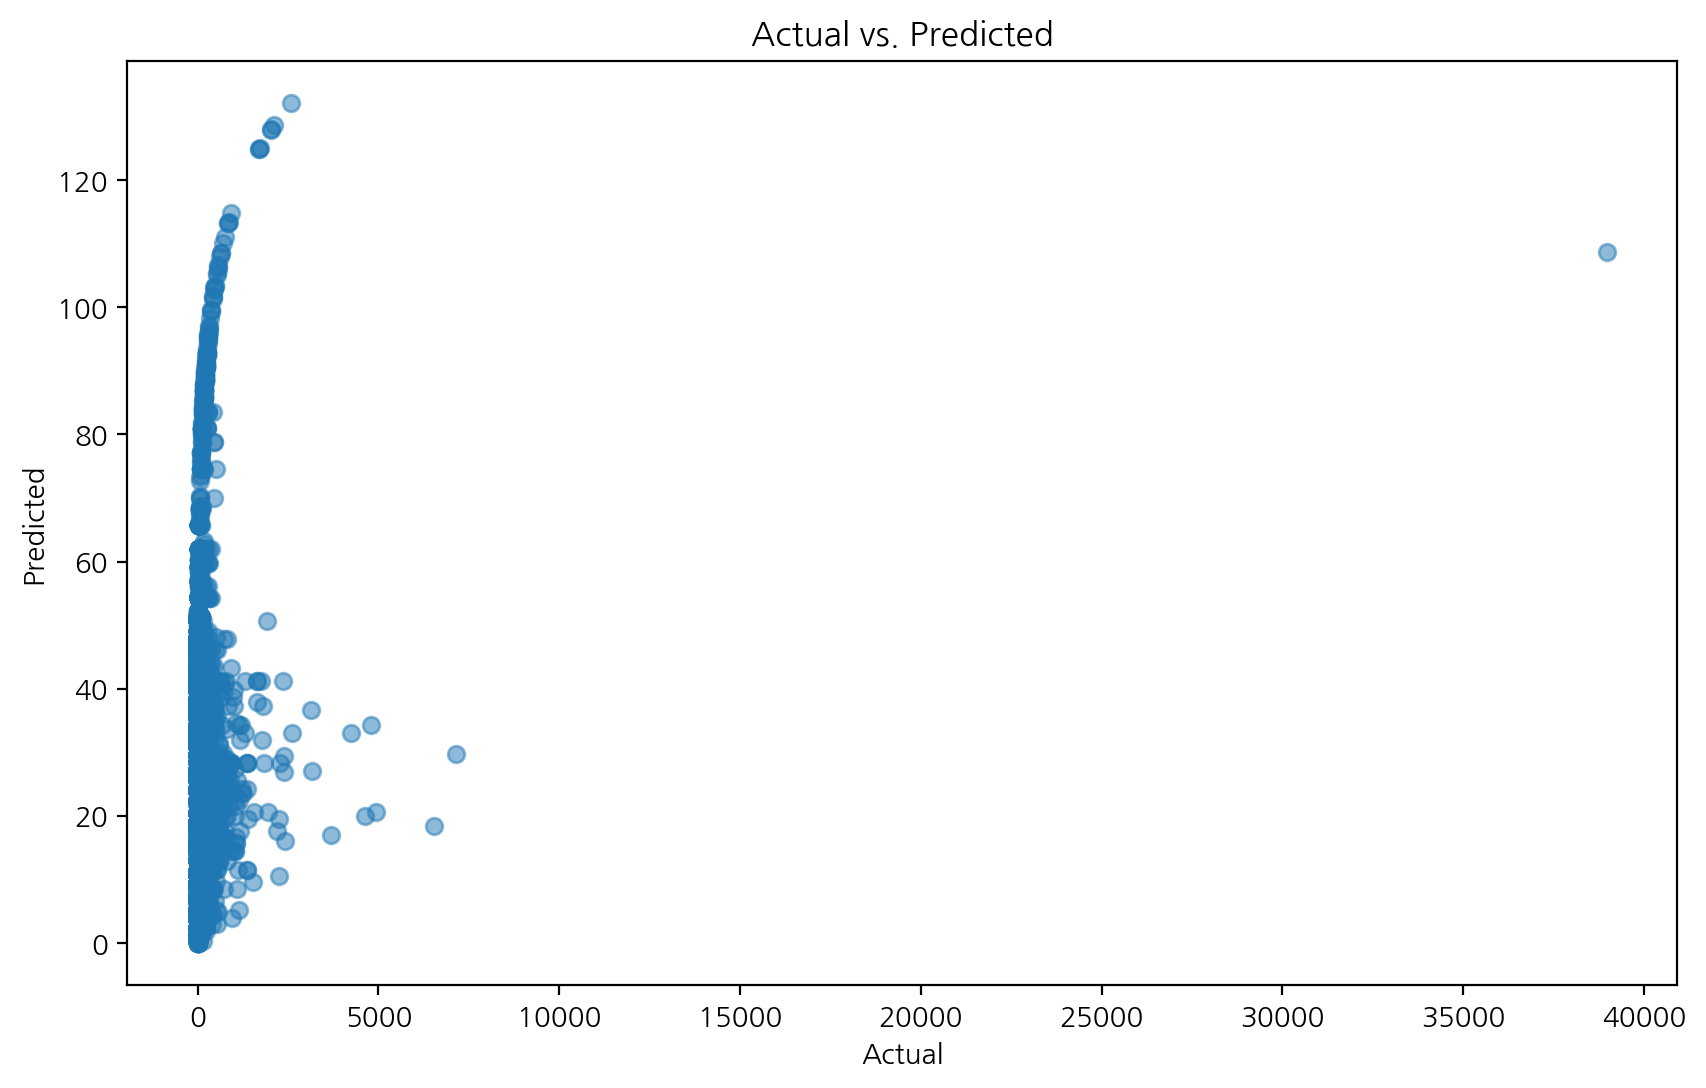

In [76]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Actual vs. Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

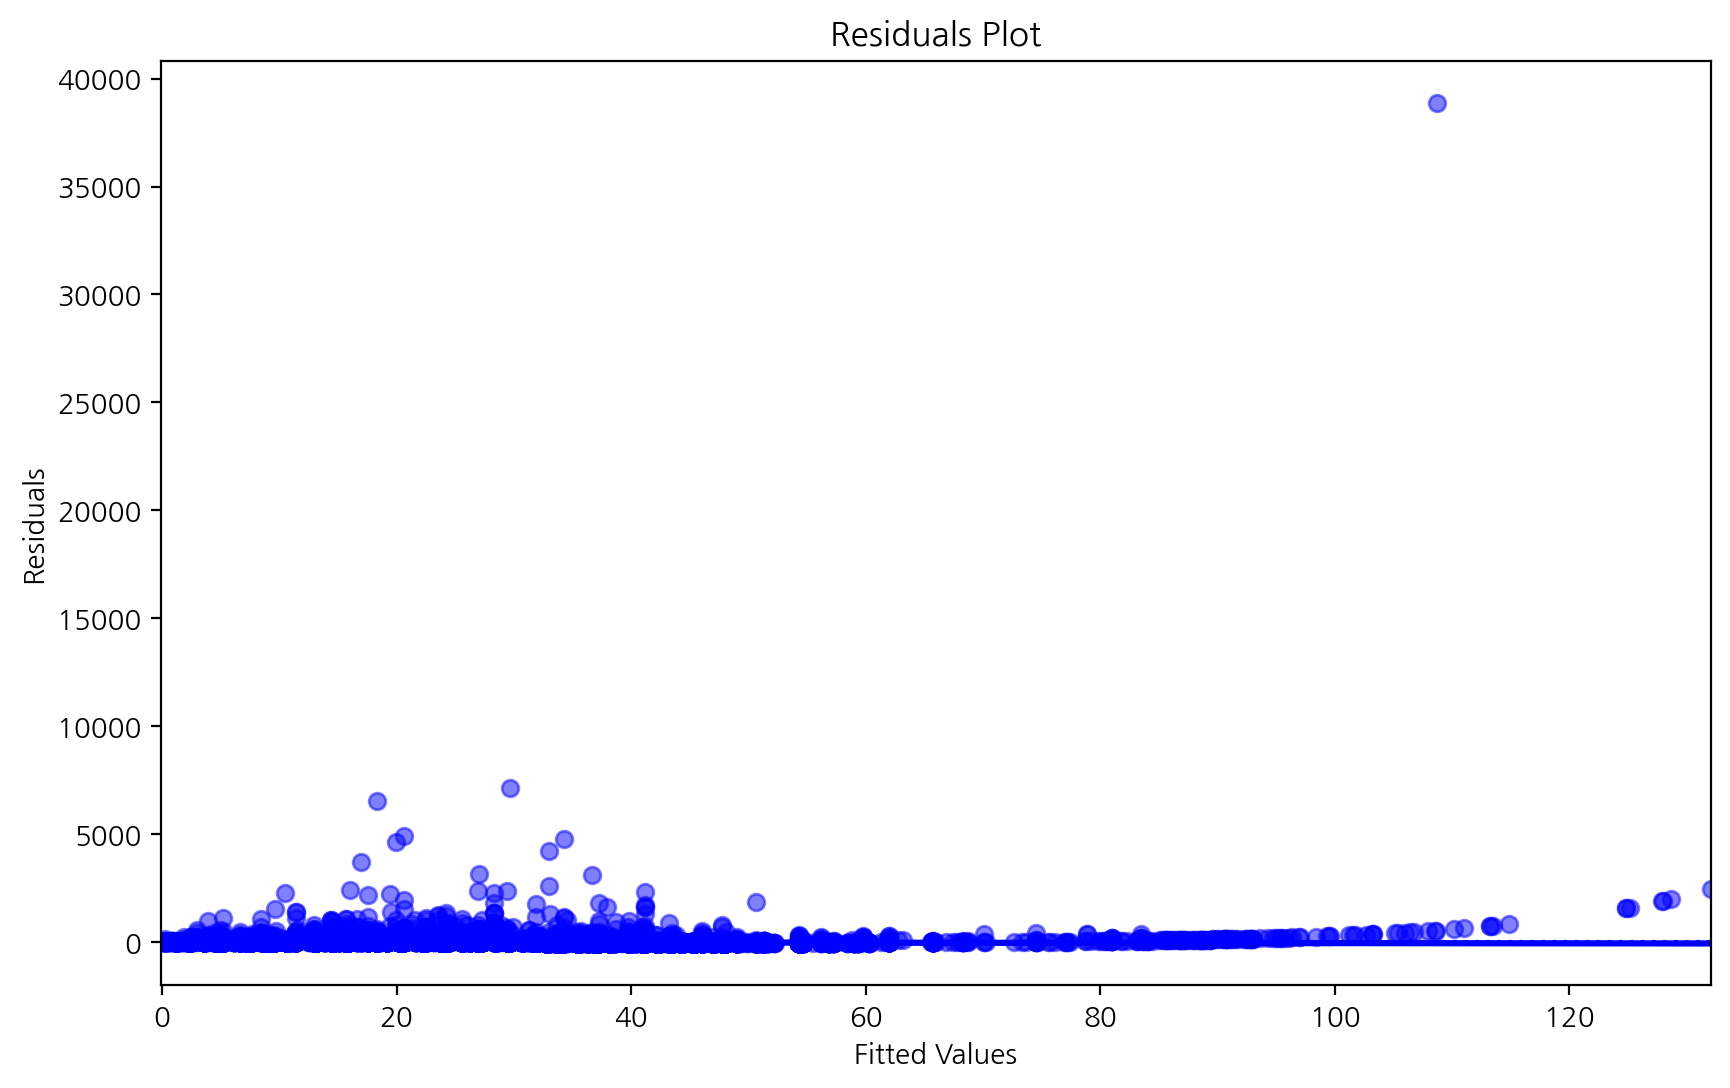

In [77]:
# 잔차 플롯
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.residplot(x=y_pred, y=residuals, lowess=True, color='blue', scatter_kws={'alpha': 0.5})
plt.title('Residuals Plot')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

p-value가 0에 가까움으로

높은 단가의 상품이 더 많은 총 판매액을 생성할 것이라는 귀무가설을 채택

## 미션3) 여러 분은 크리스마스가 온라인 소매 판매에 미치는 영향을 평가하고, 이를 바탕으로 더 효과적인 가격 및 프로모션 전략을 개발해야 합니다.  

* 다음과 같은 비즈니스 전략을 고려하여 인과 분석을 합니다. 증거의 사다리로 데이터에서 얻을 수 있는 증거의 강도를 평가합니다. 크리스마스 관련 상품과 비관련 상품 간의 판매 차이를 분석합니다.


* 프로모션 전략
    * 크리스마스 상품 프로모션 강화하여 크리스마스 관련 상품의 판매를 증진시키기 위한 특별 프로모션을 개발합니다.
    * 대상 고객을 세분화하여 크리스마스 상품에 관심이 높은 고객 세그먼트를 식별하고, 이들을 대상으로 한 마케팅 캠페인을 실행합니다.
* 재고 및 공급망 관리
    * 재고 최적화를 통해 크리스마스 시즌에 대한 수요 예측을 바탕으로 재고 수준을 조절합니다.
    * 공급망 효율화를 통해 시즌별 수요 변화에 따라 공급망을 조정하여 비용을 최소화하고, 고객 만족도를 높입니다.
* 상품 다양화
    * 상품 포트폴리오를 확장하여 크리스마스 관련 상품뿐만 아니라, 다른 시즌 상품에도 주목하여 상품 포트폴리오를 다양화합니다

* 크리스마스 시즌 동안 프로모션과 상품 가격 전략이 판매에 미치는 영향을 분석하여, 미래의 프로모션 및 가격 전략을 최적화해야 합니다.



* 다음 주어진 코드를 활용합니다.


```python
# 2011년 이전 데이터만 사용합니다.
# 프로모션 여부와 시간에 따른 데이터 분리
df_promotion = df[(df["InvoiceDate"] < "2011-01-01") & df_promotion["Description"].notnull()].dropna().copy()
df_promotion["IsChristmasPeriod"] = df_promotion["InvoiceDate"] >= "2010-12-25"
df_promotion["IsChristmasProduct"] = df_promotion["Description"].str.lower().str.contains("christmas")
```

In [78]:
# 2011년 이전 데이터만 사용합니다.
# 프로모션 여부와 시간에 따른 데이터 분리
df_promotion = df[(df["InvoiceDate"] < "2011-01-01") & df["Description"].notnull()].dropna().copy()
df_promotion["IsChristmasPeriod"] = df_promotion["InvoiceDate"] >= "2010-12-25"
df_promotion["IsChristmasProduct"] = df_promotion["Description"].str.lower().str.contains("christmas")



In [79]:
# 크리스마스 상품과 비크리스마스 상품 간의 판매 차이 분석
df_christmas = df_promotion[df_promotion["IsChristmasProduct"] == True]
df_non_christmas = df_promotion[df_promotion["IsChristmasProduct"] == False]

# 판매량 비교
sales_christmas = df_christmas["Quantity"].sum()
sales_non_christmas = df_non_christmas["Quantity"].sum()

print(f"크리스마스 상품 판매량: {sales_christmas}")
print(f"비크리스마스 상품 판매량: {sales_non_christmas}")


크리스마스 상품 판매량: 17977
비크리스마스 상품 판매량: 294288


In [94]:
df_promotion[df_promotion["IsChristmasProduct"] == True]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,TotalPrice,IsChristmasPeriod,IsChristmasProduct
46,536371,22086,PAPER CHAIN KIT 50'S CHRISTMAS,80,2010-12-01 09:00:00,2.55,13748.0,United Kingdom,12,204.00,False,True
122,536381,22086,PAPER CHAIN KIT 50'S CHRISTMAS,4,2010-12-01 09:41:00,2.95,15311.0,United Kingdom,12,11.80,False,True
172,536385,85049A,TRADITIONAL CHRISTMAS RIBBONS,12,2010-12-01 09:56:00,1.25,17420.0,United Kingdom,12,15.00,False,True
197,536389,22941,CHRISTMAS LIGHTS 10 REINDEER,6,2010-12-01 10:03:00,8.50,12431.0,Australia,12,51.00,False,True
211,536390,22941,CHRISTMAS LIGHTS 10 REINDEER,2,2010-12-01 10:19:00,8.50,17511.0,United Kingdom,12,17.00,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
41265,539766,22572,ROCKING HORSE GREEN CHRISTMAS,1,2010-12-22 11:11:00,0.85,14092.0,United Kingdom,12,0.85,False,True
41266,539766,22601,CHRISTMAS RETROSPOT ANGEL WOOD,1,2010-12-22 11:11:00,0.85,14092.0,United Kingdom,12,0.85,False,True
41267,539766,22600,CHRISTMAS RETROSPOT STAR WOOD,2,2010-12-22 11:11:00,0.85,14092.0,United Kingdom,12,1.70,False,True
41312,539826,22733,3D TRADITIONAL CHRISTMAS STICKERS,1,2010-12-22 12:39:00,1.25,15044.0,United Kingdom,12,1.25,False,True


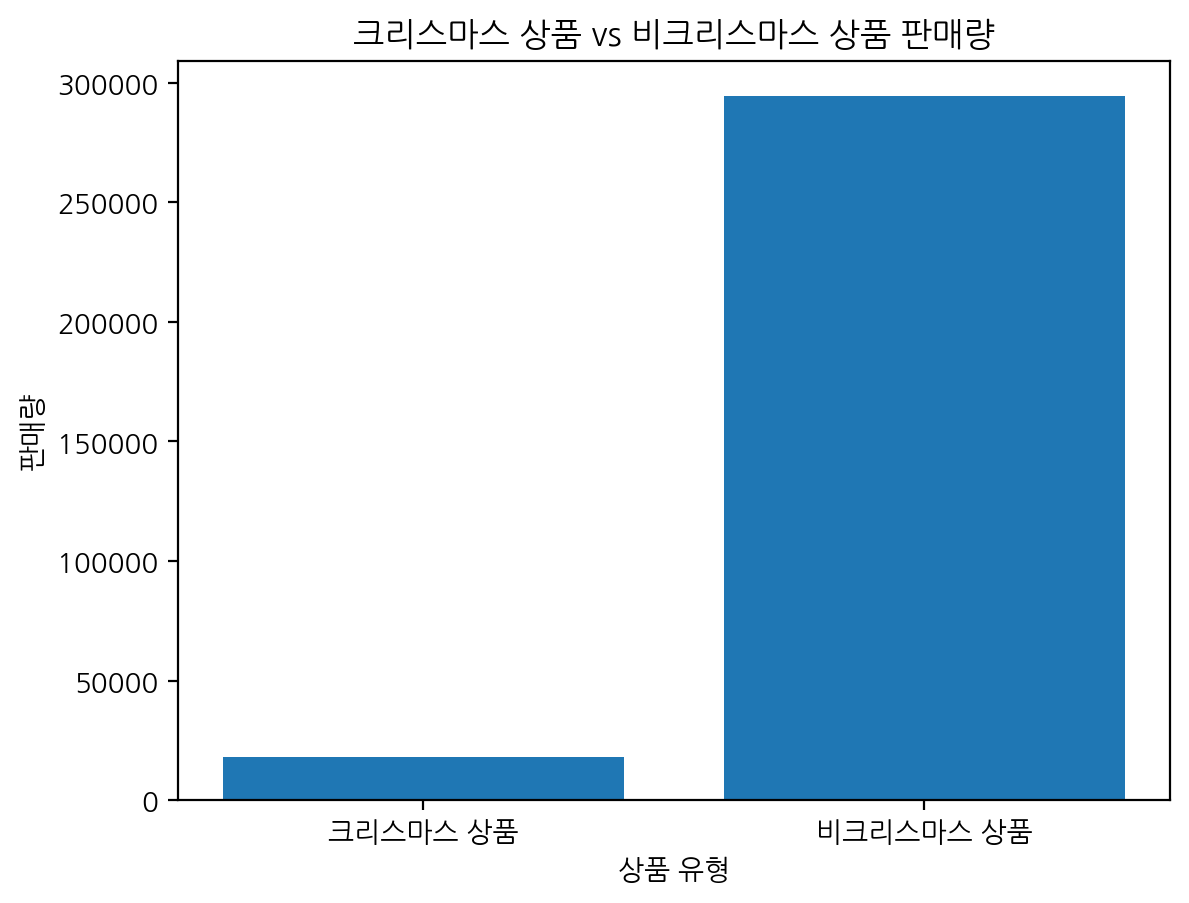

In [80]:
sales = [sales_christmas, sales_non_christmas]

# 바 차트 그리기
plt.bar(["크리스마스 상품", "비크리스마스 상품"], sales)
plt.title("크리스마스 상품 vs 비크리스마스 상품 판매량")
plt.xlabel("상품 유형")
plt.ylabel("판매량")
plt.show()

In [81]:
df_promotion

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,TotalPrice,IsChristmasPeriod,IsChristmasProduct
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,15.30,False,False
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20.34,False,False
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12,22.00,False,False
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20.34,False,False
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20.34,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
42448,539988,84380,SET OF 3 BUTTERFLY COOKIE CUTTERS,1,2010-12-23 16:06:00,1.25,18116.0,United Kingdom,12,1.25,False,False
42449,539988,84849D,HOT BATHS SOAP HOLDER,1,2010-12-23 16:06:00,1.69,18116.0,United Kingdom,12,1.69,False,False
42450,539988,84849B,FAIRY SOAP SOAP HOLDER,1,2010-12-23 16:06:00,1.69,18116.0,United Kingdom,12,1.69,False,False
42451,539988,22854,CREAM SWEETHEART EGG HOLDER,2,2010-12-23 16:06:00,4.95,18116.0,United Kingdom,12,9.90,False,False


In [84]:
# 상품 포트폴리오 다양화를 위한 상품별 판매량 분석
product_sales = df_promotion.groupby('Description')['Quantity'].sum()
diversified_portfolio = product_sales.sort_values(ascending=False)


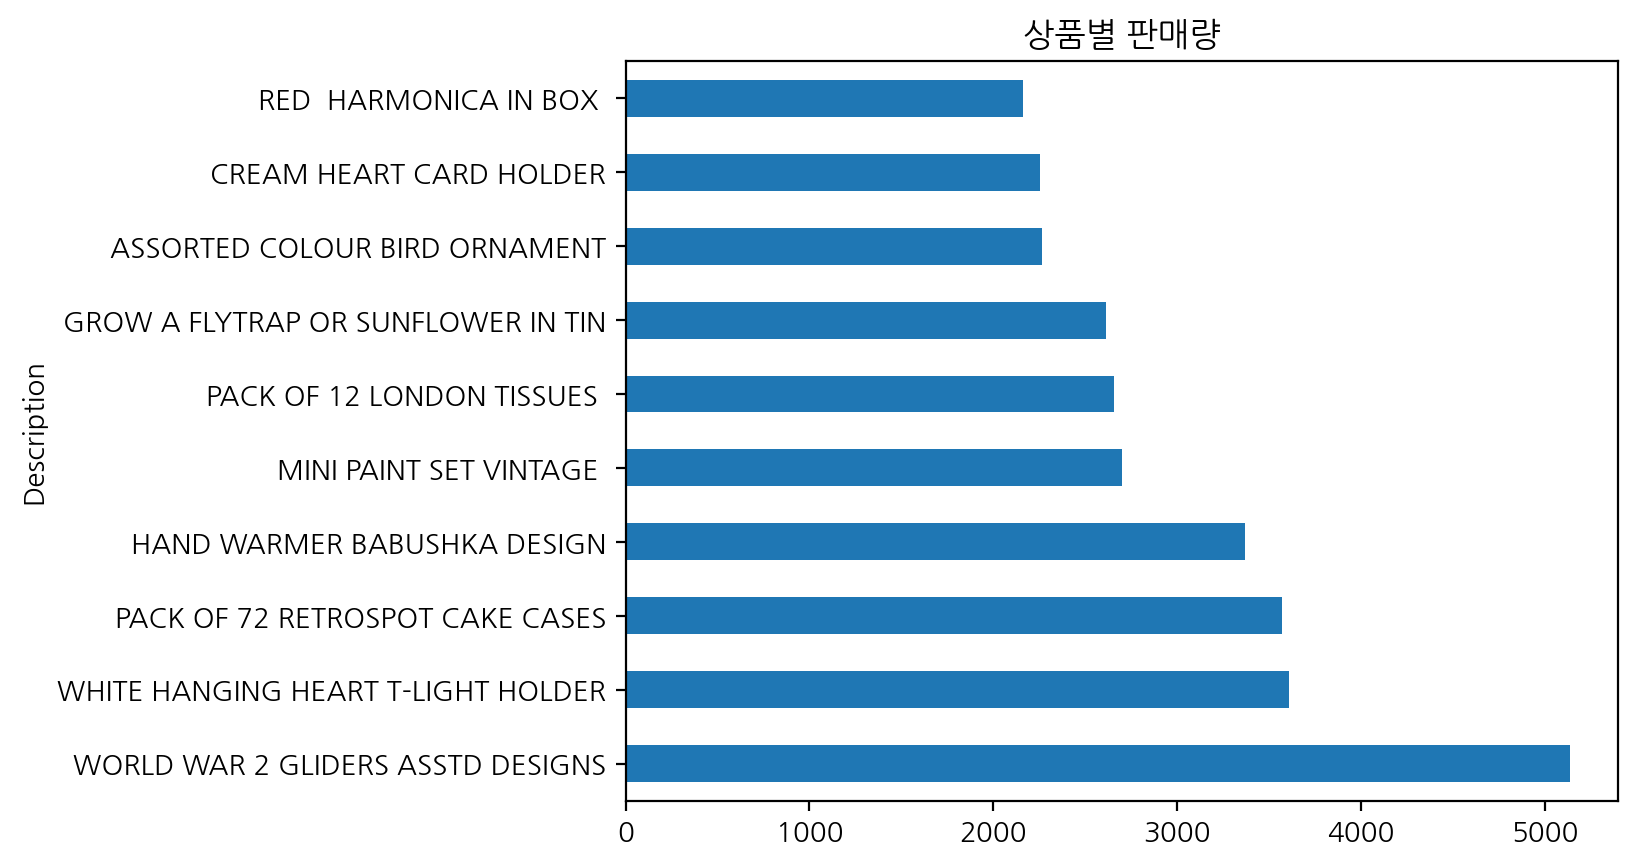

In [95]:
# 상품 포트폴리오 다양화 시각화
diversified_portfolio[:10].plot(kind='barh', title='상품별 판매량')
plt.show()

크리스마스 상품들은 잘 판매가 되지 않고 있습니다.
판매량이 높은 제품을 대상으로 크리스마스 상품 프로모션을 제공하여 판매량을 늘릴 수 있을 것 같습니다.

## 미션4) 다변량 회귀분석을 수행하여 크리스마스 기간 전후와 크리스마스 관련 상품과 비관련 상품 간의 판매량(Quantity) 차이를 'UnitPrice'와 'Country'와 함께 분석합니다.

* 판매량(Quantity)을 종속변수로 하여, 크리스마스 관련 상품 여부(IsChristmasProduct), 단가(UnitPrice), 국가(Country) 등을 독립변수로 포함하는 다변량 선형 회귀모델을 구축합니다.
* statsmodels 라이브러리(statsmodels.formula.api 의 ols)를 사용하여 모델을 구축하고, 결과를 해석합니다.
* 분석 결과를 해석하고, 이를 바탕으로 크리스마스 시즌 판매 전략에 대한 권장 사항을 제시합니다.
* 분석 과정과 결과, 그리고 비즈니스 전략에 대한 권장 사항을 포함하는 보고서를 작성합니다.
* 다음 주어진 코드를 활용합니다.

```python
import statsmodels.formula.api as smf
```

In [96]:
import statsmodels.formula.api as smf

In [97]:
# 다변량 회귀분석 모델
model = smf.ols(formula='Quantity ~ IsChristmasProduct + UnitPrice + Country', data=df_promotion).fit()

# 모델 요약 정보 출력
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:               Quantity   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     31.87
Date:                Fri, 02 Feb 2024   Prob (F-statistic):          5.46e-138
Time:                        03:59:46   Log-Likelihood:            -1.3687e+05
No. Observations:               26157   AIC:                         2.738e+05
Df Residuals:                   26133   BIC:                         2.740e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

## 미션5) 온라인 소매 데이터를 사용하여 고객이 특정 상품을 구매할지 여부를 예측합니다.
이 예측 모델을 사용하여 타겟 마케팅 전략을 수립하고, 재고 관리를 최적화합니다. 고객의 특정 상품 구매 여부(구매/미구매)를 예측하는 이진 분류 모델을 구축합니다.


1) 타겟 변수 생성: 'WHITE HANGING HEART T-LIGHT HOLDER' 상품을 구매했는지 여부를 나타내는 이진 타겟 변수(0: 미구매, 1: 구매)를 생성합니다.\
2) 특성(feature) 선택: 구매 예측에 영향을 미칠 수 있는 변수들을 선택합니다. 예를 들어, 'UnitPrice', 'Quantity', 'CustomerID', 'Country' 등이 될 수 있습니다.\
3) 범주형 변수 처리: 'Country'와 같은 범주형 변수를 숫자로 변환합니다. 원-핫 인코딩을 사용할 수 있습니다.\
4) 데이터 분할: 모델 학습을 위해 데이터를 훈련 세트와 테스트 세트로 분할합니다.\
5) 로지스틱 회귀 모델 생성 및 학습합니다.\
6) 모델을 평가 합니다.

In [98]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

df = df.dropna()
df = df[df['Description'].str.contains("T-LIGHT HOLDER")]
# 'WHITE HANGING HEART T-LIGHT HOLDER' 상품 구매 여부를 나타내는 타겟 변수 생성
df['Target'] = df['Description'] == 'WHITE HANGING HEART T-LIGHT HOLDER'
df["Target"].value_counts()

False    6720
True     2028
Name: Target, dtype: int64

In [99]:
# 특성과 타겟 변수 분리
X = pd.get_dummies(df[['UnitPrice', 'Quantity', 'CustomerID', 'Country']])
y = df['Target']


In [100]:
# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 로지스틱 회귀 모델 생성 및 학습
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# 모델 평가
y_pred = model.predict(X_test)

# 분류 보고서 출력
print(classification_report(y_test, y_pred))

# 혼동 행렬 출력
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

       False       0.78      0.92      0.84      1353
        True       0.27      0.10      0.15       397

    accuracy                           0.73      1750
   macro avg       0.52      0.51      0.49      1750
weighted avg       0.66      0.73      0.68      1750

[[1244  109]
 [ 357   40]]
